In [1]:
                             import pandas  as pd
                             import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
train        = pd.read_csv('Titanic_train.csv')
test         = pd.read_csv('Titanic_test.csv')
passengerid  = test['PassengerId']

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.shape

(418, 11)

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

'Name' est inutile est 'Cabin' manque de beaucoup de valeurs, elles seront supprimées.

In [9]:
train = train.drop(columns=['Name', 'Cabin'])
test  = test.drop(columns= ['Name', 'Cabin'])

In [10]:
# Remplacer les âges manquants par la moyenne `fullna()`
train_age_mean = train['Age'].mean()
test_age_mean  = test['Age'].mean()

train.fillna({'Age':train_age_mean}, inplace=True)
test.fillna ({'Age':train_age_mean}, inplace=True)

In [11]:
# Remplacer les 2 valeurs manquantes d'"embarled" par la valeur la plusprésenteabs
train.fillna({'Embarked':train['Embarked'].mode()[0]}, inplace=True)

In [12]:
# Supprimer 'PassengerId' ; inutile
train.drop(columns='PassengerId', inplace=True)
test.drop (columns='PassengerId', inplace=True)

### Exploration des données

<Axes: xlabel='Pclass', ylabel='Count'>

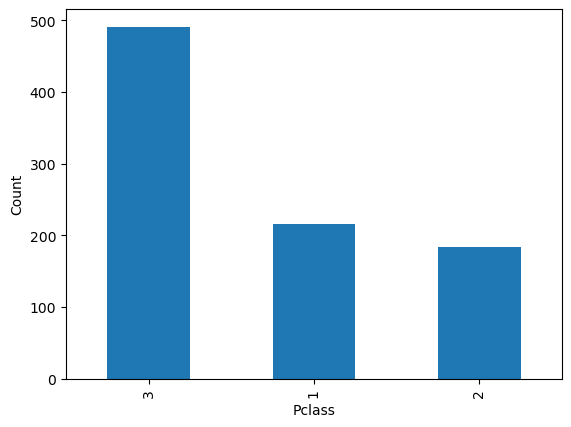

In [13]:
Pclass_count = train.Pclass.value_counts()
Pclass_count.plot(kind='bar', xlabel='Pclass', ylabel='Count')

La majorité était en troisième classe.

<Axes: xlabel='Sex', ylabel='Count'>

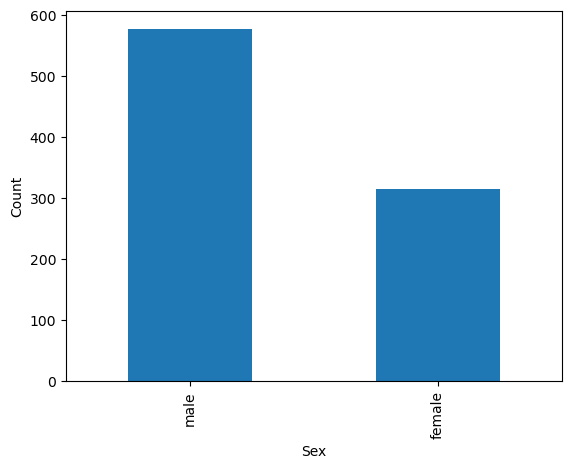

In [14]:
sex_count = train.Sex.value_counts()
sex_count.plot(kind='bar', xlabel='Sex', ylabel='Count')

Et deux fois plus d'hommes.

<Axes: xlabel='Survived', ylabel='Count'>

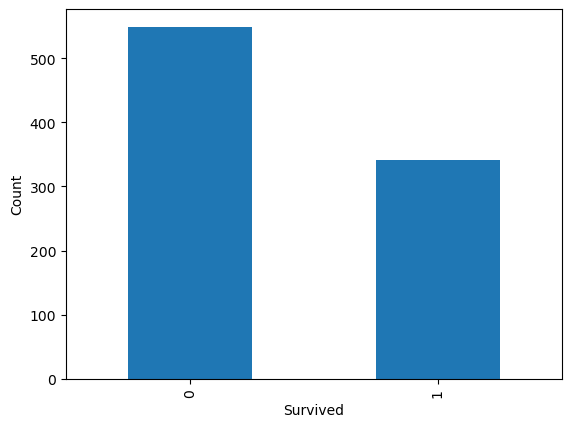

In [15]:
# Combien de personne ont survécu ?
Survived_count = train.Survived.value_counts()
Survived_count.plot(kind='bar', xlabel='Survived', ylabel='Count')

<Axes: xlabel='Sex', ylabel='count'>

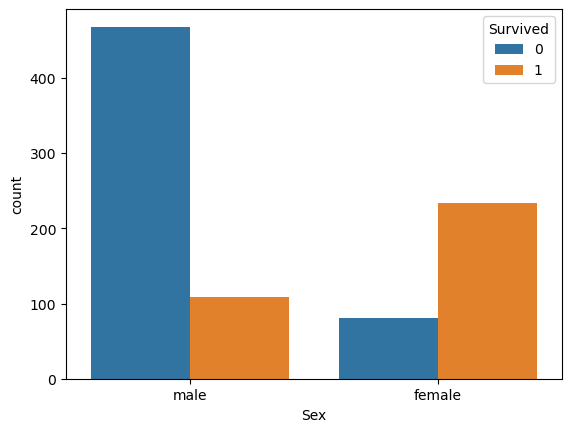

In [16]:
# Combien sont morts ?
sns.countplot(train, x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

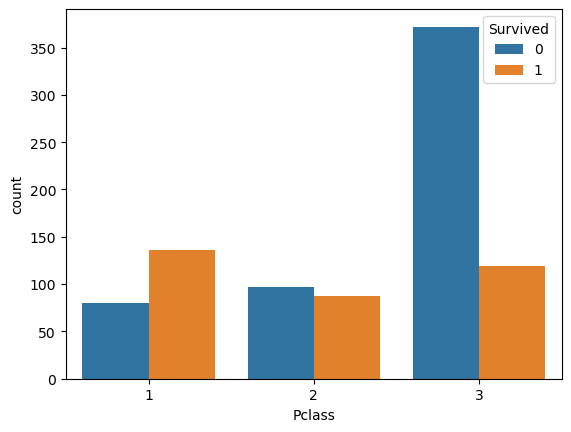

In [17]:
# Quelle classe a eu le plus de survivants ?
sns.countplot(train, x='Pclass', hue='Survived')

La plupart des morts étaient en troisième classe. La richesse est un avantage.

In [18]:
# Convertir les valeurs des colonnes catégorielles en nombres
train['Sex'] = train['Sex'].replace({'male':1, 'female': 0})
test['Sex']  = test ['Sex'].replace({'male':1, 'female': 0})

train['Embarked'] = train['Embarked'].replace({'S':2, 'C': 1, 'Q':0})
test['Embarked']  = test ['Embarked'].replace({'S':2, 'C': 1, 'Q':0})

/var/folders/n0/_5ytbzzj5tqdxd4yymn1bkhw0000gn/T/ipykernel_7227/572234978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'male':1, 'female': 0})
/var/folders/n0/_5ytbzzj5tqdxd4yymn1bkhw0000gn/T/ipykernel_7227/572234978.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex']  = test ['Sex'].replace({'male':1, 'female': 0})
/var/folders/n0/_5ytbzzj5tqdxd4yymn1bkhw0000gn/T/ipykernel_7227/572234978.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

In [19]:
# Supprimer la colonne 'Ticket'
train.drop(columns='Ticket', inplace=True)
test.drop (columns='Ticket', inplace=True)

In [20]:
# Diviser en featured et labels
y = train.Survived.copy()
x = train.drop(columns='Survived').copy()

In [21]:
# Pour avoir des données pour tester les performances des modèles, diviser ces données en ensembles d’entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=786)

#### Classificateur Decision Tree

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

dtc_prediction = dtc.predict(x_test)

dtc_score = accuracy_score(y_test, dtc_prediction)
dtc_score

0.7597765363128491

Correct.

#### Classificateur Random Foresst

In [23]:
rfc = RandomForestClassifier(max_depth=15)
rfc.fit(x_train, y_train)

rfc_prediction = rfc.predict(x_test)

rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_score

0.7932960893854749

Mieux

#### Régression logique

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_prediction = lr.predict(x_test)
lr_score      = accuracy_score(y_test, lr_prediction)
lr_score

0.7374301675977654

Moyen

#### Améliorer le classificateur Random Forest

In [25]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Meilleurs hyperparamètres :", best_params)

best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(x_train, y_train)
rfc_prediction = best_rfc.predict(x_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
print("Score d'accuracy :", rfc_score)

Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Score d'accuracy : 0.7988826815642458


In [26]:
test.fillna({'Fare':test['Fare'].mean()}, inplace=True)

In [27]:
# Utiliser ce modèle et obtenir les prédictions pour les données de test
my_prediction = best_rfc.predict(test)

submission_df = pd.DataFrame({'PassengerId':passengerid, 'Survived':my_prediction})
submission_df.to_csv('submission.csv', index=False)